# Data Exploration


In [1]:
# Import dependencies
import pandas as pd
import matplotlib.pyplot as plt
import os


In [2]:
# Read in the CSV file (data.csv) as a DataFrame
ufc_df = pd.read_csv("Resources/data.csv")
ufc_df.head()


,BPrev,BStreak,B_Age,B_Height,B_HomeTown,B_ID,B_Location,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,0,0,38.0,193.0,Hounslow England,808,Amsterdam The Netherlands,Alistair Overeem,120.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,blue
1,0,0,36.0,172.0,"Chicago, Illinois United States",1054,"Chicago, Illinois United States",Ricardo Lamas,65.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
2,0,0,39.0,167.0,"Isla Vista , California USA",959,"Sacramento, California USA",Urijah Faber,61.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,KO/TKO,red
3,0,0,33.0,167.0,"San Diego, CA USA",1056,"San Diego, CA USA",Danny Martinez,56.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red
4,0,0,36.0,185.0,Southampton England,2005,Southampton England,Tom Watson,84.0,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,DEC,red


In [3]:
#  Infer best column dtype & add missing values to rows
ufc_df = ufc_df.convert_dtypes()


In [4]:
# Convert `winby` column into a category dtype
ufc_df["winby"] = ufc_df["winby"].astype("category")


In [5]:
# Drop the non-beneficial columns
ufc_df = ufc_df.drop(
    columns=[
        "BPrev",
        "RPrev",
        "BStreak",
        "B_Location",
        "R_Location",
        "Event_ID",
        "Fight_ID",
        "B_ID",
        "R_ID",
        "B_HomeTown",
        "R_HomeTown",
        "Date",
    ]
)
ufc_df.head()


,B_Age,B_Height,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,B__Round1_Strikes_Body Significant Strikes_Attempts,...,R__Round5_TIP_Ground Time,R__Round5_TIP_Guard Control Time,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner
0,38,193,Alistair Overeem,120,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,DEC,blue
1,36,172,Ricardo Lamas,65,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,DEC,red
2,39,167,Urijah Faber,61,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,KO/TKO,red
3,33,167,Danny Martinez,56,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,DEC,red
4,36,185,Tom Watson,84,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,DEC,red


In [6]:
# Drops draws and no contest decisions from 'winner' column
# line 6 in the cell below renders this redundant, while this cell renders the 'before and after'
#    in the following cell redundant. We'll keep both for now and clean up later.
ufc_df = ufc_df[(ufc_df.winner != "draw")]
ufc_df = ufc_df[(ufc_df.winner != "no contest")]


In [7]:
# Keep only wins and losses (i.e., Red & Blue)

# Display `value_counts()` on `winner` column before modification
print("Before", "-" * 20, ufc_df.winner.value_counts(), "-" * 20, "\n", sep=os.linesep)

ufc_df = ufc_df.loc[(ufc_df.winner == "blue") | (ufc_df.winner == "red")]

# Display results
print("After", "-" * 20, ufc_df.winner.value_counts(), "-" * 20, sep=os.linesep)


Before
--------------------
red     1327
blue     951
Name: winner, dtype: Int64
--------------------


After
--------------------
red     1327
blue     951
Name: winner, dtype: Int64
--------------------


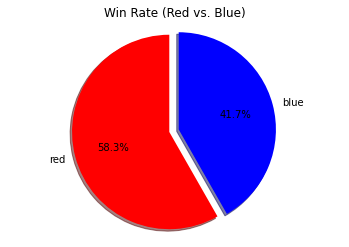

In [8]:
# Pie chart, Red vs. Blue win rate
pie_labels = ufc_df["winner"].value_counts().index
pie_values = ufc_df["winner"].value_counts().values
explode = (0, 0.1)  # only "explode" the 2nd slice

fig1, ax1 = plt.subplots()

ax1.pie(
    x=pie_values,
    labels=pie_labels,
    colors=["red", "blue"],
    explode=explode,
    autopct="%1.1f%%",
    shadow=True,
    startangle=90,
)
ax1.axis("equal")  # Equal aspect ratio ensures that pie is drawn as a circle.
ax1.axes.set_title("Win Rate (Red vs. Blue)")

plt.show()


## Data Exploration: Age


In [9]:
# Find the max value in the Age columns
ufc_df[["R_Age", "B_Age"]].describe()


,R_Age,B_Age
count,2253.000000,2261.000000
mean,32.421216,31.768244
std,4.203064,4.156803
min,20.000000,20.000000
25%,29.000000,29.000000
50%,32.000000,31.000000
75%,35.000000,35.000000
max,48.000000,48.000000


<AxesSubplot:>

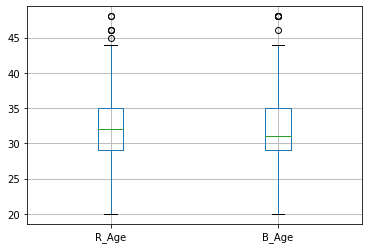

In [10]:
# Use Box & Whisker plot to visualize outliers
ufc_df.boxplot(column=["R_Age", "B_Age"])


In [11]:
# Create four equal-sized buckets for the Age columns based on sample quantiles

ufc_df["B_Age_Bucket"] = pd.qcut(
    x=ufc_df["B_Age"], q=4, labels=None, retbins=False, precision=3
)


ufc_df["R_Age_Bucket"] = pd.qcut(
    x=ufc_df["R_Age"], q=4, labels=None, retbins=False, precision=3
)

ufc_df.head()

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.
/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if __name__ == '__main__':


,B_Age,B_Height,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,B__Round1_Strikes_Body Significant Strikes_Attempts,...,R__Round5_TIP_Half Guard Control Time,R__Round5_TIP_Misc. Ground Control Time,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner,B_Age_Bucket,R_Age_Bucket
0,38,193,Alistair Overeem,120,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,DEC,blue,"(35.0, 48.0]","(35.0, 48.0]"
1,36,172,Ricardo Lamas,65,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,DEC,red,"(35.0, 48.0]","(29.0, 32.0]"
2,39,167,Urijah Faber,61,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,KO/TKO,red,"(35.0, 48.0]","(29.0, 32.0]"
3,33,167,Danny Martinez,56,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,DEC,red,"(31.0, 35.0]","(35.0, 48.0]"
4,36,185,Tom Watson,84,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,DEC,red,"(35.0, 48.0]","(35.0, 48.0]"


<AxesSubplot:title={'center':'Red Age Buckets'}>

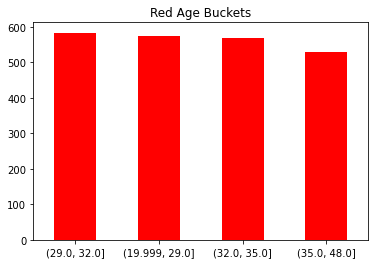

In [12]:
# Create a bar graph to visualize R_Age_Bucket
ufc_df["R_Age_Bucket"].value_counts().plot(
    kind="bar", color="red", rot=0, title="Red Age Buckets"
)


<AxesSubplot:title={'center':'Blue Age Buckets'}>

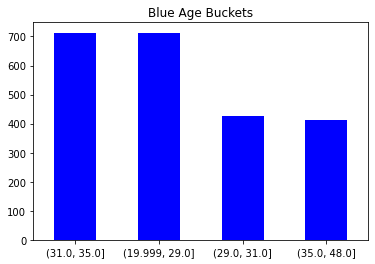

In [13]:
# Create a bar graph to visualize B_Age_Bucket
ufc_df["B_Age_Bucket"].value_counts().plot(
    kind="bar", color="blue", rot=0, title="Blue Age Buckets"
)


In [14]:
# Drop age columns; I do not think we should follow through with bucketing based on age other than for visualizations.
# ufc_df = ufc_df.drop(columns=["R_Age", "B_Age"])


## Data Exploration: Height

In [15]:
# Find the max value in the Height columns
ufc_df[["R_Height", "B_Height"]].describe()


,R_Height,B_Height
count,2255.000000,2261.000000
mean,177.142350,177.321539
std,8.918623,8.830489
min,152.000000,152.000000
25%,170.000000,172.000000
50%,177.000000,177.000000
75%,185.000000,182.000000
max,213.000000,213.000000


<AxesSubplot:>

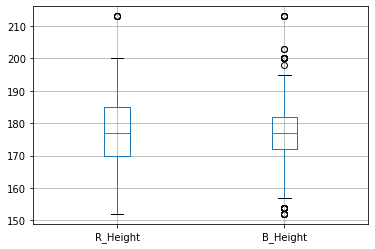

In [16]:
# Use Box & Whisker plot to visualize Height outliers
ufc_df.boxplot(column=["R_Height", "B_Height"])


In [17]:
# Create four equal-sized buckets for the Height columns based on sample quantiles

ufc_df["B_Height_Bucket"] = pd.qcut(
    x=ufc_df["B_Height"], q=4, labels=None, retbins=False, precision=3
)


ufc_df["R_Height_Bucket"] = pd.qcut(
    x=ufc_df["R_Height"], q=4, labels=None, retbins=False, precision=3
)

ufc_df.head()

/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:4: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  after removing the cwd from sys.path.
/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:9: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  if __name__ == '__main__':


,B_Age,B_Height,B_Name,B_Weight,B__Round1_Grappling_Reversals_Landed,B__Round1_Grappling_Standups_Landed,B__Round1_Grappling_Submissions_Attempts,B__Round1_Grappling_Takedowns_Attempts,B__Round1_Grappling_Takedowns_Landed,B__Round1_Strikes_Body Significant Strikes_Attempts,...,R__Round5_TIP_Mount Control Time,R__Round5_TIP_Neutral Time,R__Round5_TIP_Side Control Time,R__Round5_TIP_Standing Time,winby,winner,B_Age_Bucket,R_Age_Bucket,B_Height_Bucket,R_Height_Bucket
0,38,193,Alistair Overeem,120,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,DEC,blue,"(35.0, 48.0]","(35.0, 48.0]","(182.0, 213.0]","(185.0, 213.0]"
1,36,172,Ricardo Lamas,65,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,DEC,red,"(35.0, 48.0]","(29.0, 32.0]","(151.999, 172.0]","(151.999, 170.0]"
2,39,167,Urijah Faber,61,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,KO/TKO,red,"(35.0, 48.0]","(29.0, 32.0]","(151.999, 172.0]","(151.999, 170.0]"
3,33,167,Danny Martinez,56,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,DEC,red,"(31.0, 35.0]","(35.0, 48.0]","(151.999, 172.0]","(151.999, 170.0]"
4,36,185,Tom Watson,84,<NA>,<NA>,<NA>,<NA>,<NA>,<NA>,...,<NA>,<NA>,<NA>,<NA>,DEC,red,"(35.0, 48.0]","(35.0, 48.0]","(182.0, 213.0]","(177.0, 185.0]"


<AxesSubplot:title={'center':'Red Height Buckets'}>

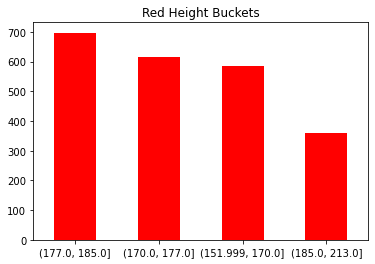

In [18]:
# Create a bar graph to visualize R_Height_Bucket
ufc_df["R_Height_Bucket"].value_counts().plot(
    kind="bar", color="red", rot=0, title="Red Height Buckets"
)


<AxesSubplot:title={'center':'Blue Height Buckets'}>

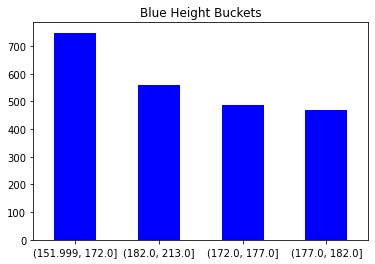

In [19]:
# Create a bar graph to visualize B_Height_Bucket
ufc_df["B_Height_Bucket"].value_counts().plot(
    kind="bar", color="blue", rot=0, title="Blue Height Buckets"
)


## Data Exploration: Weight


|   Weight Class    | Minimum Weight | Maximum Weight |
| :---------------: | :------------: | :------------: |
|    Heavyweight    |       93       |      120       |
| Light Heavyweight |      83.9      |       93       |
|   Middleweight    |      77.1      |      83.9      |
|   Welterweight    |      70.3      |      77.1      |
|    Lightweight    |      65.8      |      70.3      |
|   Featherweight   |      61.2      |      65.8      |
|   Bantamweight    |      56.7      |      61.2      |
|     Flyweight     |      52.2      |      56.7      |
|   Strawweight\*   |       0        |      52.2      |

- "The women’s UFC division is split into only 4 classes: strawweight, flyweight, bantamweight, and featherweight. The strawweight class is only used in the women’s division and men do not compete in it."


In [20]:
bins = [0, 52.2, 56.7, 61.2, 65.8, 70.3, 77.1, 83.9, 93, 120]
labels = [
    "Strawweight",
    "Flyweight",
    "Bantamweight",
    "Featherweight",
    "Lightweight",
    "Welterweight",
    "Middleweight",
    "Light Heavyweight",
    "Heavyweight",
]


### Red Weight


In [21]:
ufc_df["R_Weight"].describe()


count    2257.000000
mean       73.813026
std        15.494381
min        52.000000
25%        61.000000
50%        70.000000
75%        84.000000
max       120.000000
Name: R_Weight, dtype: float64

<AxesSubplot:>

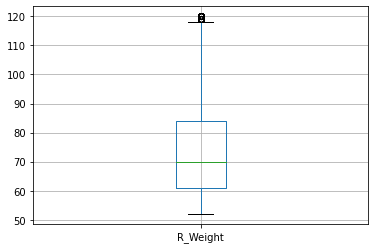

In [22]:
ufc_df.boxplot(column="R_Weight")


In [23]:
# Assign bucket by UFC weight class
ufc_df["R_Weight_Class"] = pd.cut(ufc_df["R_Weight"], bins=bins, labels=labels)


/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


### Blue Weight


In [24]:
ufc_df["B_Weight"].describe()


count    2266.000000
mean       73.674757
std        15.413696
min        52.000000
25%        61.000000
50%        70.000000
75%        84.000000
max       120.000000
Name: B_Weight, dtype: float64

<AxesSubplot:>

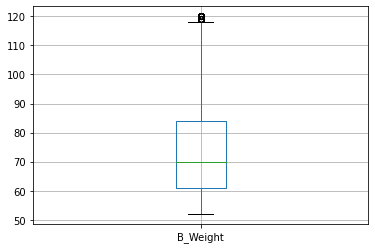

In [25]:
ufc_df.boxplot(column="B_Weight")


In [26]:
# Assign bucket by UFC weight class
ufc_df["B_Weight_Class"] = pd.cut(ufc_df["B_Weight"], bins=bins, labels=labels)


/opt/anaconda3/envs/mlenv/lib/python3.7/site-packages/ipykernel_launcher.py:2: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead.  To get a de-fragmented frame, use `newframe = frame.copy()`
  


## Testing

Making sure `R_Weight_Class` == `B_Weight_Class`; we should not need two columns for this.


In [27]:
pd.DataFrame(
    ufc_df["R_Weight_Class"] == ufc_df["B_Weight_Class"]
).value_counts()  # lol.


True     1860
False     418
dtype: int64

In [28]:
# TODO: Our current dataset has issues with weight.
# There are a bunch of outputs where the weight classes are not matching up (fighter_r vs. fighter_b).
# The weights are given in kg, but there are no decimal points, so the numbers are rounded.
# Also, the weight classes have historically changed.

# For #2312:
# Fight outcome: http://ufcstats.com/fight-details/397ace87deeb8697
# Matchup stats: http://ufcstats.com/fight-details/06641a8c62e45661

# Is the ufcstats showing the weight they had during that fight or their current weight?

ufc_df[
    ["R_Weight", "B_Weight", "R_Weight_Class", "B_Weight_Class", "R_Name", "B_Name"]
].loc[ufc_df["R_Weight_Class"] != ufc_df["B_Weight_Class"]]


,R_Weight,B_Weight,R_Weight_Class,B_Weight_Class,R_Name,B_Name
9,61,56,Bantamweight,Flyweight,John Lineker,Ali Bagautinov
14,70,77,Lightweight,Welterweight,Cristiano Marcello,Joe Proctor
16,70,65,Lightweight,Featherweight,Charles Oliveira,Andy Ogle
17,61,65,Bantamweight,Featherweight,Douglas Silva de Andrade,Zubaira Tukhugov
19,61,56,Bantamweight,Flyweight,Iuri Alcantara,Wilson Reis
...,...,...,...,...,...,...
2307,77,70,Welterweight,Lightweight,Ryan LaFlare,Tony Martin
2308,61,65,Bantamweight,Featherweight,Lina Lansberg,Yana Kunitskaya
2312,118,65,Heavyweight,Featherweight,Derrick Lewis,Alexander Volkov
2313,65,70,Featherweight,Lightweight,Gray Maynard,Nik Lentz


In [29]:
# Save mismatched weightclasses to csv file

# ufc_df.loc[ufc_df["R_Weight_Class"] != ufc_df["B_Weight_Class"]].to_csv(
#     "out.csv",
#     columns=[
#         "R_Weight",
#         "B_Weight",
#         "R_Weight_Class",
#         "B_Weight_Class",
#         "R_Name",
#         "B_Name",
#     ],
# )


In [30]:
# Red weight nulls
print(ufc_df["R_Weight"].isnull().sum())
print(ufc_df["R_Weight_Class"].isnull().sum())

# Blue weight nulls
print(ufc_df["B_Weight"].isnull().sum())
print(ufc_df["B_Weight_Class"].isnull().sum())


21
21
12
12


# Machine Learning Model


## Logistic Regression


In [31]:
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import make_column_selector as selector
from sklearn.linear_model import LogisticRegression


numerical_cols = [
    "Last_round",
    "Max_round",
    "B_Height",
    "B_Weight",
    "R_Height",
    "R_Weight",
    "B_Age",
    "R_Age",
]
categorical_cols = ["winby"]

# numerical_cols = selector(dtype_include="number")
# categorical_cols = selector(dtype_include="category")

# Imputation transformer for completing missing values.
# Standardize features by removing the mean and scaling to unit variance with `StandardScalar()`.
numeric_transformer = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="constant")),
        ("scaler", StandardScaler()),
    ]
)

# categorical_transformer = OneHotEncoder(handle_unknown="ignore")
categorical_transformer = Pipeline(
    steps=[
        ("onehot", OneHotEncoder(handle_unknown="ignore")),
    ]
)


preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numerical_cols),
        ("cat", categorical_transformer, categorical_cols),
    ]
)

# Append classifier to preprocessing pipeline.
# Now we have a full prediction pipeline.
clf = Pipeline(
    steps=[
        ("preprocessor", preprocessor),
        ("classifier", LogisticRegression(max_iter=500)),
    ]
)

X = ufc_df.drop("winner", axis=1)
y = ufc_df["winner"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)

clf.fit(X_train, y_train)
print("model score: %.3f" % clf.score(X_test, y_test))


model score: 0.601


### Display Diagram of Pipeline


In [32]:
from sklearn import set_config

set_config(display="diagram")
clf


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='constant')),
                                                                  ('scaler',
                                                                   StandardScaler())]),
                                                  ['Last_round', 'Max_round',
                                                   'B_Height', 'B_Weight',
                                                   'R_Height', 'R_Weight',
                                                   'B_Age', 'R_Age']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['winby'])])),
                ('classifier', LogisticRegression(max_iter=500))])

### Classification Report


In [33]:
from sklearn.metrics import classification_report

y_pred = clf.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

        blue       0.57      0.29      0.38       195
         red       0.61      0.84      0.71       261

    accuracy                           0.60       456
   macro avg       0.59      0.56      0.54       456
weighted avg       0.59      0.60      0.57       456



### Model Persistence


In [34]:
# from joblib import dump, load

# dump(clf, "clf.joblib")

# !!! WARNING: DO NOT LOAD RANDOM OBJECTS !!!
# clf = load("clf.joblib")

# # Prediction based on saved pipeline.
# selection = X.iloc[[5]]
# clf.predict(selection)


### Export Dataset


In [35]:
# Export dataset to CSV
ufc_df.to_csv("Resources/new_data.csv", index=False)
